# Modeling Product Defect Rates Using Beta Distribution

## 🏭 Business Background (Manufacturing)
You're working at a high-precision electronics manufacturing plant that produces thousands of microchips daily. Each batch goes through a quality check.

Each batch is either pass or fail (binary outcome).

Over time, you want to model the uncertainty in the true defect rate.

You don’t have thousands of data points every time — but you want to continuously update your estimate.

💡 That’s where the Beta distribution shines — it models probabilities (proportions) like defect rate, conversion rate, CTR, etc.

## 🎯 Goal
Estimate true defect rate of the manufacturing line using Beta Distribution.

Simulate Bayesian updates as more data comes in.

Support decision-making (halt production, raise alert, etc.).


## 🔢 Why Beta Distribution?

| Feature                        | Why Beta?                                      |
|-------------------------------|------------------------------------------------|
| Range                         | 0 to 1                                         |
| Use Case                      | Modeling **probabilities** and **proportions** |
| Real-world fit                | Defect rate, conversion rate, CTR, etc.        |
| Can handle small samples      | ✅ Yes                                          |
| Conjugate prior to Binomial   | ✅ Perfect for Bayesian updating               |

## ✅ Step 1: Simulate Defect Rate Data

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta

np.random.seed(42)

# Let's say true defect rate is around 3%
true_defect_rate = 0.03

# Simulate 30 batches, each with 100 units
batches = 30
batch_size = 100
defects = np.random.binomial(n=batch_size, p=true_defect_rate, size=batches)

df = pd.DataFrame({
    'Batch_ID': range(1, batches+1),
    'Units_Produced': batch_size,
    'Defects': defects,
    'Passes': batch_size - defects
})
df['Defect_Rate'] = df['Defects'] / df['Units_Produced']
print(df.head())


   Batch_ID  Units_Produced  Defects  Passes  Defect_Rate
0         1             100        2      98         0.02
1         2             100        6      94         0.06
2         3             100        4      96         0.04
3         4             100        3      97         0.03
4         5             100        1      99         0.01


## ✅ Step 2: Visualize Observed Defect Rates

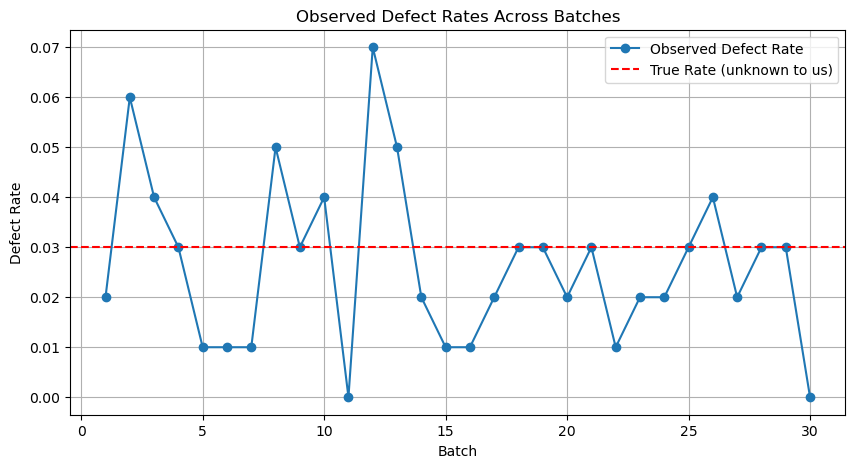

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(df['Batch_ID'], df['Defect_Rate'], marker='o', label='Observed Defect Rate')
plt.axhline(true_defect_rate, color='red', linestyle='--', label='True Rate (unknown to us)')
plt.title("Observed Defect Rates Across Batches")
plt.xlabel("Batch")
plt.ylabel("Defect Rate")
plt.legend()
plt.grid(True)
plt.show()


## ✅ Step 3: Initialize Beta Distribution
Let’s start with a uniform prior: Beta(1, 1)

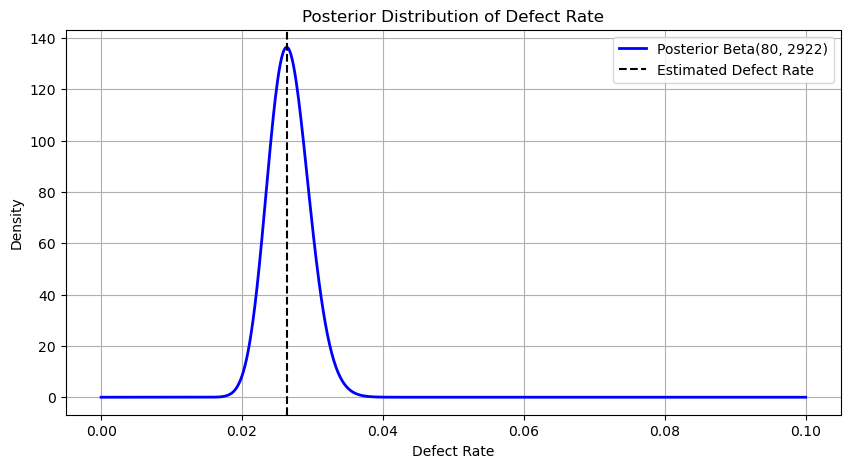

In [21]:
a_prior = 1
b_prior = 1

# Accumulate observed defects and passes
total_defects = df['Defects'].sum()
total_passes = df['Passes'].sum()

# Posterior update
a_post = a_prior + total_defects
b_post = b_prior + total_passes

# Plot Beta posterior
x = np.linspace(0, 0.10, 1000)
posterior = beta.pdf(x, a_post, b_post)

plt.figure(figsize=(10, 5))
plt.plot(x, posterior, color='blue', lw=2, label=f'Posterior Beta({a_post}, {b_post})')
plt.axvline(total_defects / (total_defects + total_passes), color='black', linestyle='--', label='Estimated Defect Rate')
plt.title("Posterior Distribution of Defect Rate")
plt.xlabel("Defect Rate")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


## ✅ Step 4: Probability That Defect Rate > 5%?

In [40]:
prob_defect_over_5 = 1 - beta.cdf(0.05, a_post, b_post)
print(f"Probability that defect rate > 5%: {prob_defect_over_5:.2%}")


Probability that defect rate > 5%: 0.00%


## ✅ Step 5: Business Decisions
📌 If probability of defect rate > 5% exceeds a threshold (say 10%), raise an alert.

In [34]:
if prob_defect_over_5 > 0.10:
    print("🚨 Alert: Defect rate likely above 5% — Investigate immediately!")
else:
    print("✅ Defect rate under control — Continue monitoring.")


✅ Defect rate under control — Continue monitoring.
